# Part two of Independent Project completed for LaunchCode's CoderGirl program for the Data Science track.

## This portion of the project entails training and testing machine learning models on data from [UCI's Heart Disease dataset](https://www.kaggle.com/ronitf/heart-disease-uci/version/1#), as well as performing feature engineering and visualization of model performance metrics.

## --

# I. Load initial libraries and the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from statistics import mean
%matplotlib inline
plt.show()

In [2]:
heart = pd.read_csv('heart_new.csv', index_col=0)
heart.drop(columns='ST_depression_bins', inplace=True)
heart.head()

,age,sex,pain_type,restingBP,chol,fasting_sugar,resting_ecg,maxHR,exercise_angina,ST_depression,ST_peak_slope,vessels_fluoro,thal_severity,heart_disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# II: Modeling

## K-Nearest Neighbors

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

X = heart.drop(columns='heart_disease')
y = heart['heart_disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

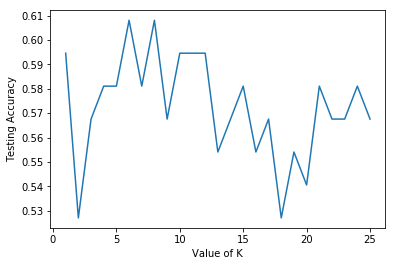

In [4]:
def plot_KNN_scores(X, y):
    """Plots the relationship between K-values and testing accuracy"""
    
    k_range = range(1, 26)
    scores = []
        
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        scores.append(knn.score(X_test, y_test))
    
    # Plot
    plt.plot(k_range, scores)
    plt.xlabel("Value of K")
    plt.ylabel("Testing Accuracy")
    plt.rcParams["figure.figsize"] = [10.0, 10.0]

plot_KNN_scores(X, y)

## Decision Tree Classification & Visualization

In [5]:
from sklearn.tree import DecisionTreeClassifier

X = heart.drop(columns='heart_disease')
y = heart.heart_disease

# Create decision tree function to get average score
def dtree(X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    
    dtree = DecisionTreeClassifier(random_state=0)
    model = dtree.fit(X_train, y_train)
    epochs = 1000
    score = []
    
    while epochs > 0:
        score.append(model.score(X_test, y_test))
        epochs -= 1
    
    return mean(score)

dt_score_one = dtree(X, y)

print("Decision Tree Accuracy Score: ", dt_score_one)

Decision Tree Accuracy Score:  0.6891891891891891


In [7]:
# Viasualize
import pydotplus
from IPython.display import Image
from sklearn import tree

# Create classifier object
dec_tree = DecisionTreeClassifier(random_state=0)

# Train
model = dec_tree.fit(X, y)

# Create DOT data
dot_data = tree.export_graphviz(dec_tree, feature_names=heart.drop(columns='heart_disease').columns.values, class_names="01")

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Save graph
graph.write_png("decision_tree.png")

True

![Decision Tree Visualization](decision_tree.png)

## Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression

X = heart.drop(columns='heart_disease')
y = heart.heart_disease

def logreg(X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    
    logreg = LogisticRegression()
    model = logreg.fit(X_train, y_train)
    epochs = 1000
    score = []
    
    while epochs > 0:
        score.append(model.score(X_test, y_test))
        epochs -= 1
    
    return mean(score)

lg_score_one = logreg(X, y)

print("LogReg Accuracy Score: ", lg_score_one)

C:\Users\lilli\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogReg Accuracy Score:  0.8918918918918919


In [9]:
# Create logistic regression function that returns an averaged prediction array
def logreg_avg_pred(X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    logreg = LogisticRegression(random_state=0, multi_class="ovr")
    model = logreg.fit(X_train, y_train)
    pred_matrix = model.predict(X_test)
    
    for n in range(1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
        pred_matrix = np.vstack((pred_matrix, model.predict(X_test)))
        
    mean_pred = np.mean(pred_matrix, axis=0)
    
    return mean_pred

C:\Users\lilli\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0.5, 69.0, 'True Label')

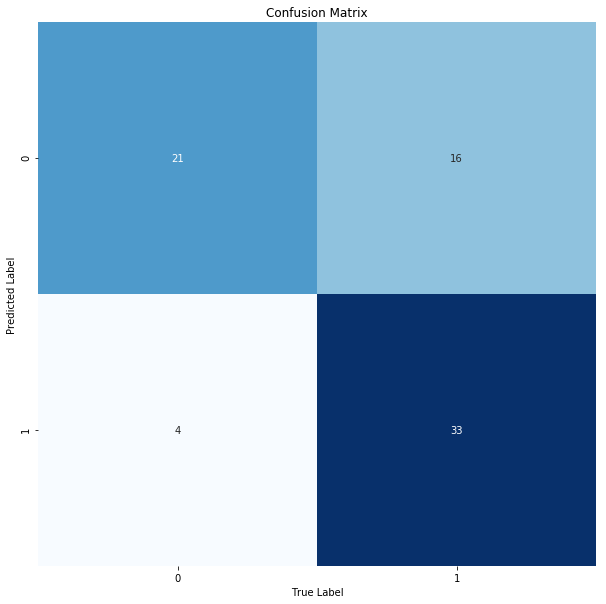

In [10]:
from sklearn.metrics import confusion_matrix

X = heart.drop(columns='heart_disease')
y = heart.heart_disease

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

y_pred = logreg_avg_pred(X, y)

df = confusion_matrix(y_test, y_pred)

sns.heatmap(df, annot=True, cbar=None, cmap="Blues")
plt.rcParams["figure.figsize"] = [12.0, 10.0]
plt.title("Confusion Matrix")
plt.ylabel("Predicted Label")
plt.xlabel("True Label")

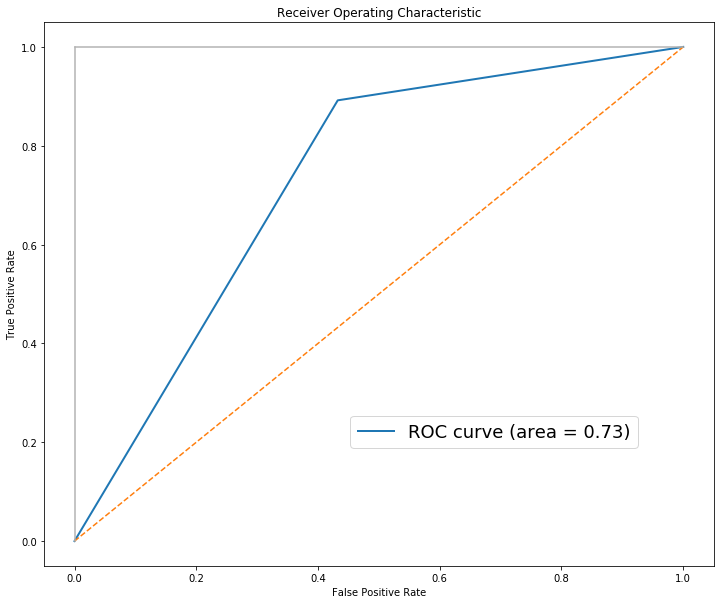

In [11]:
# Plot ROC Curve
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

falsePos, truePos, threshold = roc_curve(y_test, y_pred)

plt.plot(falsePos, truePos, lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred))
plt.plot([0, 1], ls='--')
plt.plot([0, 0], [1, 0], c=".7")
plt.plot([1, 1], c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc=4, bbox_to_anchor=(0.90, 0.2), fontsize=18)
plt.rcParams["figure.figsize"] = [12.0, 10.0]

## Random Forest Classification

In [12]:
from sklearn.ensemble import RandomForestClassifier

X = heart.drop(columns='heart_disease')
y = heart.heart_disease

def randomforest(X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    
    randomforest = RandomForestClassifier()
    model = randomforest.fit(X_train, y_train)
    epochs = 1000
    score = []
    
    while epochs > 0:
        score.append(model.score(X_test, y_test))
        epochs -= 1
    
    return mean(score)

rf_score_one = randomforest(X, y)
print("Random Forest Accuracy Score: ", rf_score_one)

C:\Users\lilli\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Accuracy Score:  0.7432432432432432


### Identifying important features of Random Forest model

In [13]:
features=heart.columns
X = heart.drop(columns='heart_disease')
y = heart.heart_disease
rfc = RandomForestClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y)
model = rfc.fit(X_train, y_train)

featureMatrix = model.feature_importances_

for n in range(500):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    model = rfc.fit(X_train, y_train)
    featureMatrix = np.vstack((featureMatrix, model.feature_importances_))
    
mean_importances = np.mean(featureMatrix, axis=0)

C:\Users\lilli\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


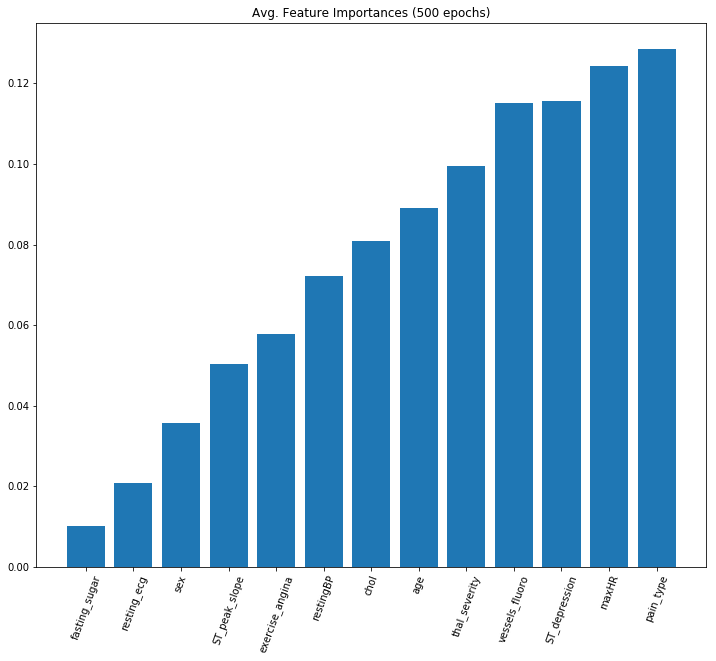

In [14]:
# Sort importances
indices = np.argsort(mean_importances)

# Rearrange features so they match the sorted features
names = [heart.columns[i] for i in indices]

# Plot
plt.figure()
plt.title("Avg. Feature Importances (500 epochs)")
plt.bar(range(len(indices)), mean_importances[indices])
plt.xticks(range(len(indices)), [features[i] for i in indices], rotation=70)
plt.show()
plt.rcParams["figure.figsize"] = [12.0, 10.0]

# III. Feature Engineering

## Create new feature based on those with higher than average maximum heart rates [(AHA)](https://www.heart.org/en/healthy-living/fitness/fitness-basics/target-heart-rates)

In [15]:
# The American Heart Associated defines higher than avgerage heart rate as any heart rate greater than 220 minus one's age

# Create a list of rows containing only those with higher than average maximum heart rates
def maxHR_above_avg():
    above_avg = []
    
    for index, row in heart.iterrows():
        if (220 - row['age'] < row['maxHR']):
            above_avg.append(1)
        else:
            above_avg.append(0)
    
    return above_avg

# Create a new column in heart dataframe
heart['maxHR_above_avg'] = maxHR_above_avg()

heart.head()

,age,sex,pain_type,restingBP,chol,fasting_sugar,resting_ecg,maxHR,exercise_angina,ST_depression,ST_peak_slope,vessels_fluoro,thal_severity,heart_disease,maxHR_above_avg
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0


## Create a new dataframe based on the top five most important features and transform on 0-1 scale

### Reassign values to features based on their correlation with heart disease (see EDA notebook)

E.g. An ST depression of 0 (bucketed) is more highly correlated with heart disease than a depression of 4. Therefore, I will change the 0's to 4's and 1's to 3's.

In [16]:
columns = ['age', 'sex', 'pain_type', 'restingBP', 'chol', 'fasting_sugar', 'resting_ecg', 'maxHR', 'exercise_angina', 'ST_depression', 'ST_peak_slope', 'vessels_fluoro']
heart2 = heart.drop(columns=columns)
heart2.head()

,thal_severity,heart_disease,maxHR_above_avg
0,1,1,0
1,2,1,1
2,2,1,0
3,2,1,1
4,2,1,0


In [17]:
# Reassign pain_type values to reflect correlation with heart disease
heart2['pain_type_corr'] = heart['pain_type'].apply(lambda x: 1 if x == 3
                                                     else 2 if x == 2
                                                     else 3 if x == 1
                                                     else 4)

In [18]:
heart2['ST_dep_corr'] = heart['ST_depression'].apply(lambda x: 4 if x < 1
                                                     else 3 if x < 2
                                                     else 2 if x < 3
                                                     else 1 if x < 4
                                                     else 0)

In [19]:
heart2['vessels_corr'] = heart['vessels_fluoro'].apply(lambda x: 4 if x == 0
                                                       else 3 if x == 1
                                                       else 2 if x == 3
                                                       else 0)

In [20]:
heart2.head()

,thal_severity,heart_disease,maxHR_above_avg,pain_type_corr,ST_dep_corr,vessels_corr
0,1,1,0,1,2,4
1,2,1,1,2,1,4
2,2,1,0,3,3,4
3,2,1,1,3,4,4
4,2,1,0,4,4,4


In [21]:
from sklearn.preprocessing import MinMaxScaler

columns = ['maxHR_above_avg', 'pain_type_corr', 'ST_dep_corr', 'vessels_corr', 'thal_severity']
X = heart2[columns]
y = heart2.heart_disease

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

heart2 = pd.DataFrame(X_scaled, columns=columns)
heart2['heart_disease'] = heart['heart_disease']
heart2 = heart2.round(decimals=5)
heart2.describe()

C:\Users\lilli\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,maxHR_above_avg,pain_type_corr,ST_dep_corr,vessels_corr,thal_severity,heart_disease
count,294.000000,294.000000,294.000000,294.000000,294.000000,285.000000
mean,0.210884,0.675737,0.820578,0.779762,0.766442,0.568421
std,0.408632,0.344953,0.243327,0.341534,0.203924,0.496168
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.333330,0.750000,0.750000,0.666670,0.000000
50%,0.000000,0.666670,1.000000,1.000000,0.666670,1.000000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
# Check for null values after feature transformation
print(heart2.isnull().any())

# Find indices of null values
na_indices = heart2.loc[pd.isna(heart2['heart_disease']), :].index.tolist()
print(na_indices)

maxHR_above_avg    False
pain_type_corr     False
ST_dep_corr        False
vessels_corr       False
thal_severity      False
heart_disease       True
dtype: bool
[28, 85, 164, 204, 220, 221, 223, 246, 248]


In [23]:
# Fill null values with values from original dataframe
fill_na = heart['heart_disease'].iloc[na_indices].tolist()
fill_na = pd.Series(np.array(fill_na), index=na_indices)

# Check null values again
heart2['heart_disease'] = heart2['heart_disease'].fillna(fill_na)
heart2.isnull().any()

maxHR_above_avg    False
pain_type_corr     False
ST_dep_corr        False
vessels_corr       False
thal_severity      False
heart_disease      False
dtype: bool

In [24]:
heart2['feature_sums'] = heart2['maxHR_above_avg'] + heart2['pain_type_corr'] + heart2['ST_dep_corr'] \
                        + heart2['vessels_corr'] + heart2['thal_severity']

heart2.head()

,maxHR_above_avg,pain_type_corr,ST_dep_corr,vessels_corr,thal_severity,heart_disease,feature_sums
0,0.0,0.00000,0.50,1.0,0.33333,1.0,1.83333
1,1.0,0.33333,0.25,1.0,0.66667,1.0,3.25000
2,0.0,0.66667,0.75,1.0,0.66667,1.0,3.08334
3,1.0,0.66667,1.00,1.0,0.66667,1.0,4.33334
4,0.0,1.00000,1.00,1.0,0.66667,1.0,3.66667


## Bucket the feature_sums values for better visualization

In [25]:
heart2['feature_sums'].describe()

count    294.000000
mean       3.253403
std        0.665342
min        1.166670
25%        2.750000
50%        3.250000
75%        3.666670
max        5.000000
Name: feature_sums, dtype: float64

In [26]:
# Bucket feature_sums feature
heart2['bucket_feature_sums'] = heart2['feature_sums'].apply(lambda x: 1.0 if x < 1.29
                                                             else 1.5 if x < 1.79
                                                             else 2.0 if x < 2.29
                                                             else 2.5 if x < 2.79
                                                             else 3.0 if x < 3.29
                                                             else 3.5 if x < 3.79
                                                             else 4.0 if x < 4.29
                                                             else 4.5 if x < 4.79
                                                             else 5.0)

In [27]:
heart2.head()

,maxHR_above_avg,pain_type_corr,ST_dep_corr,vessels_corr,thal_severity,heart_disease,feature_sums,bucket_feature_sums
0,0.0,0.00000,0.50,1.0,0.33333,1.0,1.83333,2.0
1,1.0,0.33333,0.25,1.0,0.66667,1.0,3.25000,3.0
2,0.0,0.66667,0.75,1.0,0.66667,1.0,3.08334,3.0
3,1.0,0.66667,1.00,1.0,0.66667,1.0,4.33334,4.5
4,0.0,1.00000,1.00,1.0,0.66667,1.0,3.66667,3.5


### Visualize Relationship of Feature Sums to Heart Disease

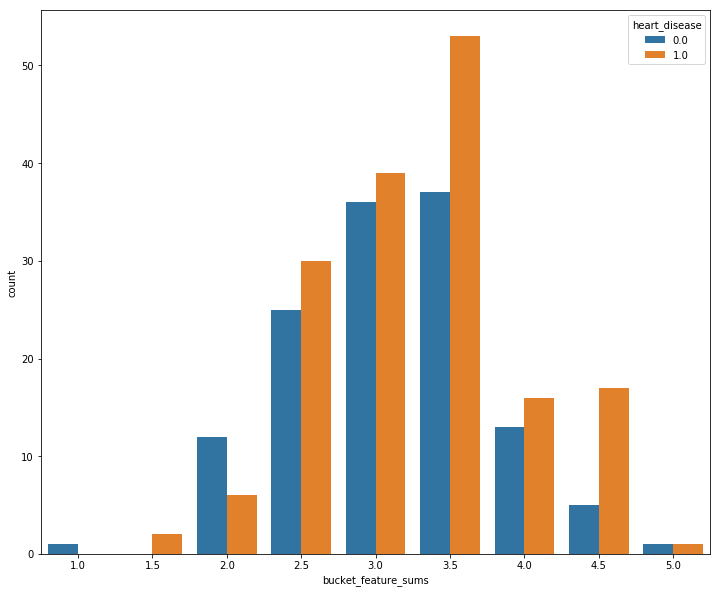

In [28]:
sns.countplot('bucket_feature_sums', data=heart2, hue="heart_disease")

([<matplotlib.axis.XTick at 0x1d64b8cc828>,
 <a list of 2 Text xticklabel objects>)

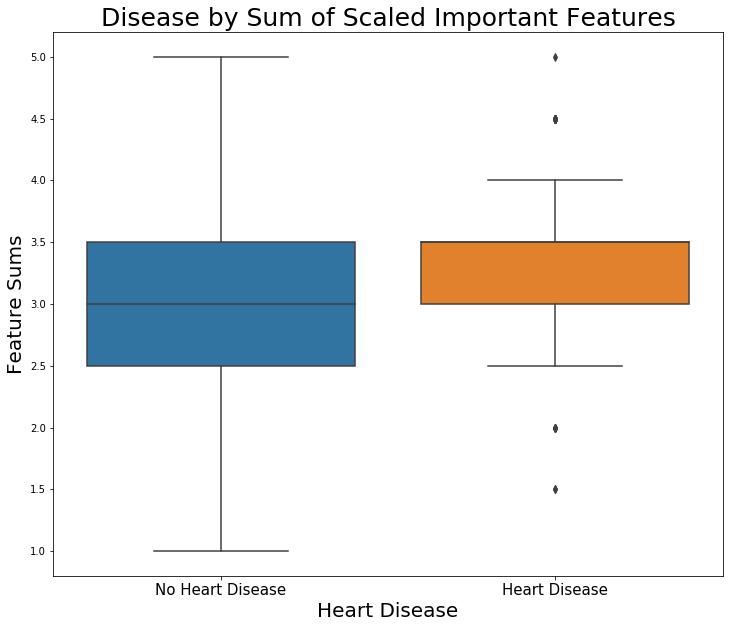

In [29]:
sns.boxplot(x='heart_disease', y='bucket_feature_sums', data=heart2)

plt.rcParams['figure.figsize'] = (10, 10)
plt.xlabel('Heart Disease', fontsize=20)
plt.ylabel('Feature Sums', fontsize=20)
plt.title('Disease by Sum of Scaled Important Features', fontsize=25)
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'], fontsize=15)

# IV. Modeling II - Train and test models on dataframe of scaled important features

## K-Nearest Neighbors

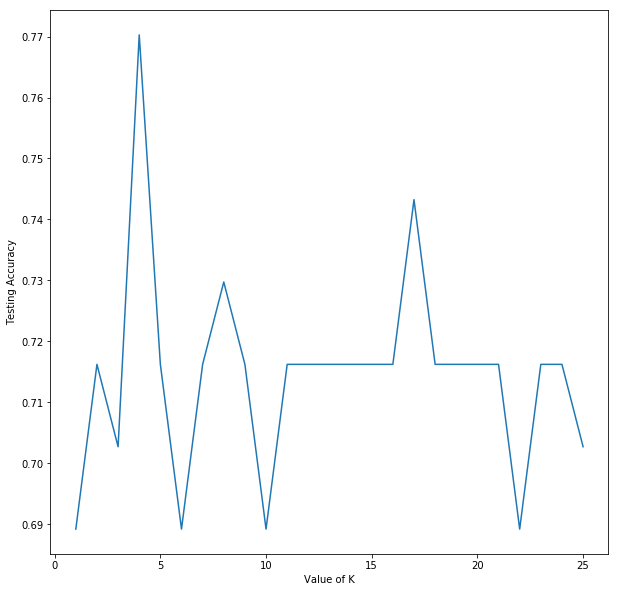

In [30]:
X = heart2.drop(columns='heart_disease')
y = heart2['heart_disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

plot_KNN_scores(X, y)

## Decision Tree Classification & Visualization

In [31]:
from sklearn.tree import DecisionTreeClassifier

X = heart2.drop(columns='heart_disease')
y = heart2.heart_disease

acc = dtree(X, y)

print("Decision Tree Accuracy Score \n New score: ", acc, "\n \t versus \n Old score: ", dt_score_one)

Decision Tree Accuracy Score 
 New score:  0.7027027027027027 
 	 versus 
 Old score:  0.6891891891891891


In [32]:
features = heart2.drop(columns='heart_disease')
target = heart2.heart_disease

# Create classifier object
dec_tree = DecisionTreeClassifier(random_state=0)

# Train
model = dec_tree.fit(features, target)

# Create DOT data
dot_data = tree.export_graphviz(dec_tree, feature_names=heart2.drop(columns='heart_disease').columns.values, class_names="01")

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Save graph
graph.write_png("updated_decision_tree.png")

True

![Decision Tree Visualization](updated_decision_tree.png)

## Logistic Regression

In [33]:
X = heart2.drop(columns='heart_disease')
y = heart2.heart_disease

lg_new_score = logreg(X, y)

print("Logistic Regression Score \n New Score: ", lg_new_score, " \n \t versus \n Old score: ", lg_score_one)

C:\Users\lilli\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression Score 
 New Score:  0.7702702702702703  
 	 versus 
 Old score:  0.8918918918918919


In [34]:
# Train Multiclass Classifier
from sklearn.preprocessing import StandardScaler

features = heart2.drop(columns='heart_disease')
target = heart2.heart_disease

# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

C:\Users\lilli\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0.5, 69.0, 'True Label')

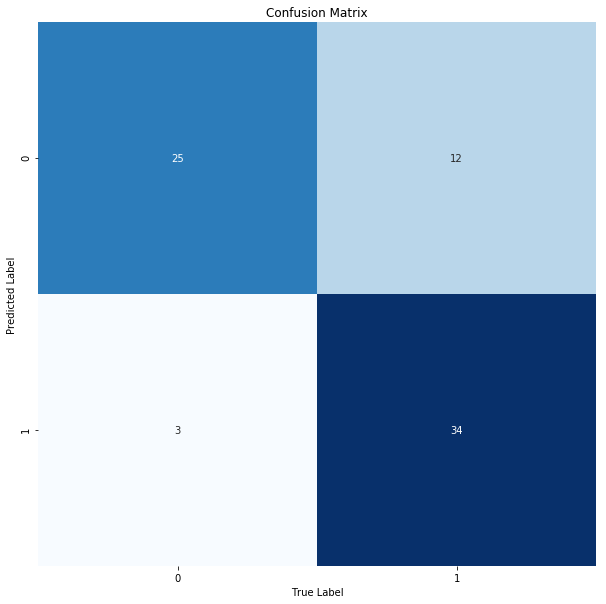

In [35]:
from sklearn.metrics import confusion_matrix

X = heart2.drop(columns='heart_disease')
y = heart2.heart_disease

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

y_pred_std = logreg_avg_pred(features_standardized, target)

df = confusion_matrix(y_test, y_pred_std)

sns.heatmap(df, annot=True, cbar=None, cmap="Blues")
plt.rcParams["figure.figsize"] = [12.0, 10.0]
plt.title("Confusion Matrix")
plt.ylabel("Predicted Label")
plt.xlabel("True Label")

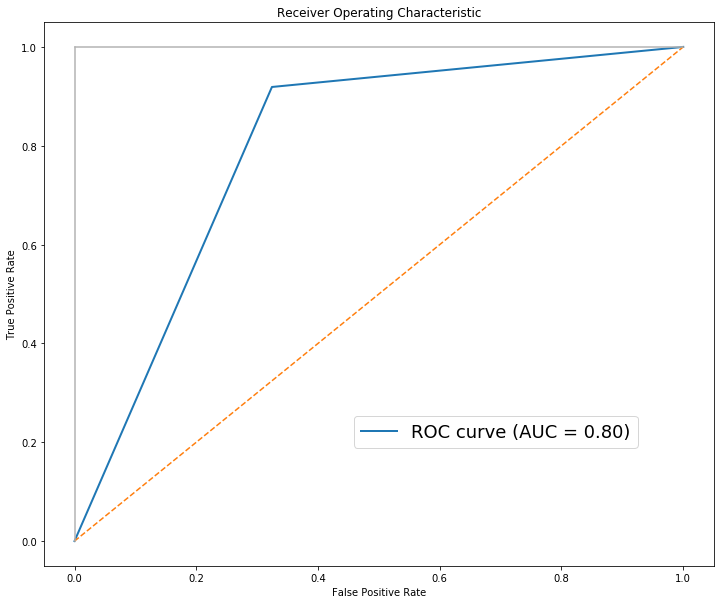

In [36]:
# Plot ROC Curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(features_standardized, target, random_state=1)

falsePos, truePos, threshold = roc_curve(y_test, y_pred_std)

plt.plot(falsePos, truePos, lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_score(y_test, y_pred_std))
plt.plot([0, 1], ls='--')
plt.plot([0, 0], [1, 0], c=".7")
plt.plot([1, 1], c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc=4, bbox_to_anchor=(0.90, 0.2), fontsize=18)
plt.rcParams["figure.figsize"] = [12.0, 10.0]

## Random Forest Classification

In [39]:
X = heart2.drop(columns='heart_disease')
y = heart2.heart_disease

rf_score_new = randomforest(X, y)

print("Random Forest Accuracy Score \n New score: ", rf_score_new, " \n \t versus \n Old score:", rf_score_one)

C:\Users\lilli\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Accuracy Score 
 New score:  0.7702702702702703  
 	 versus 
 Old score: 0.7432432432432432


# V. Comparison of Model Performance and Final Thoughts